# 1. Importing the possibly required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline


# 2. Loading the data into the data frame

In [2]:
df_data=pd.read_csv('webmd.csv', na_values=' ')
df_data.shape

(362806, 12)

In [3]:
#to display the top 5 rows
df_data.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1


In [4]:
#to display the bottom 5 rows
df_data.tail(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,NaN,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,NaN,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


# 3. Checking the dataframe detail

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
Age              350604 non-null object
Condition        362763 non-null object
Date             362806 non-null object
Drug             362806 non-null object
DrugId           362806 non-null int64
EaseofUse        362806 non-null int64
Effectiveness    362806 non-null int64
Reviews          320945 non-null object
Satisfaction     362806 non-null int64
Sex              336269 non-null object
Sides            345346 non-null object
UsefulCount      362806 non-null int64
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


# 4. Dropping irrelevant columns

In [6]:
df_data=df_data.drop(['Date', 'DrugId', 'Reviews', 'Sides', 'UsefulCount'], axis=1)

In [7]:
#to display the random 5 rows
df_data.sample(5)

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
103382,25-34,Birth Control,microgestin fe tablet,5,5,4,Female
219975,25-34,Major Depressive Disorder,viibryd,3,3,2,Female
106149,19-24,Depression,prozac,5,4,4,Female
177745,19-24,Birth Control,tri-sprintec,1,5,1,Female
40628,35-44,Strep Throat,azithromycin packet macrolide antibiotics,5,5,4,Male


# 5. Renaming the columns

In [8]:
df_data=df_data.rename(columns={"Satisfaction": "Rating"})
df_data.head(5)

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
0,75 or over,Stuffy Nose,25dph-7.5peh,5,5,5,Male
1,25-34,Cold Symptoms,25dph-7.5peh,5,5,5,Female
2,65-74,Other,warfarin (bulk) 100 % powder,2,3,3,Female
3,75 or over,Other,warfarin (bulk) 100 % powder,2,2,1,Female
4,35-44,Other,warfarin (bulk) 100 % powder,1,1,1,Male


# 6. Dropping the unused rows

In [9]:
#selecting the rows of our target which is pain condition  
df_data=df_data[df_data.Condition.str.contains('Pain', na=False)]
df_data.shape

(53649, 7)

In [10]:
#to display the random 5 rows
df_data.sample(5)

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
354784,35-44,Joint Pain,capzasin-hp cream,1,1,1,Female
319330,55-64,"Disorder characterized by Stiff, Tender & Pain...",cyclobenzaprine hcl er,2,2,2,Female
182594,35-44,Neuropathic Pain,tramadol hcl er,5,4,4,Female
55282,45-54,Pain,"oxycodone tablet, oral only",4,3,3,Male
50751,55-64,Neuropathic Pain,oxycodone hcl solution,5,5,5,Male


# 7. Data Cleaning and Manupulation

In [11]:
#calculate the total null vaues in each column:
df_data.isna().sum()

Age              1905
Condition           0
Drug                0
EaseofUse           0
Effectiveness       0
Rating              0
Sex              3698
dtype: int64

In [12]:
#since Age and Sex are both the determining variable through out this project, 
#they cant be null, hence drop the null values from data set
df_data.dropna(inplace=True)
df_data.shape

(49313, 7)

In [13]:
#check types drug used for pain reliever
df_data['Drug'].nunique()

606

In [14]:
#check age demography
df_data.Age.value_counts()

45-54         13966
55-64         11851
35-44          8579
25-34          5545
65-74          5215
19-24          1962
75 or over     1738
13-18           410
7-12             21
3-6              14
0-2              12
Name: Age, dtype: int64

In [15]:
#replacing age range with approximate average age for simplicity
df_data['Age'].replace(['0-2','3-6','7-12','13-18','19-24','25-34','35-44','45-54','55-64','65-74','75 or over'],
                  [1,5,10,15,20,30,40,50,60,70,80], inplace=True)

In [16]:
#to display the random 5 rows
df_data.sample(5)

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
287888,20,Pain,hydrocodone-acetaminophen,5,5,5,Female
72086,50,Neuropathic Pain,neurontin capsule,5,3,4,Female
64651,30,Pain,naproxen tablet,1,1,1,Female
673,60,Neuropathic Pain,lyrica,5,2,1,Male
271093,50,Neuropathic Pain,"gabapentin tablet, extended release 24 hr",5,4,4,Female


# 8. Histograms and Density Plots

## 8.1 Frequency Hinstogram

### Frequency Histogram of top five Drug by Age

Text(0, 0.5, 'Drug Frequency')

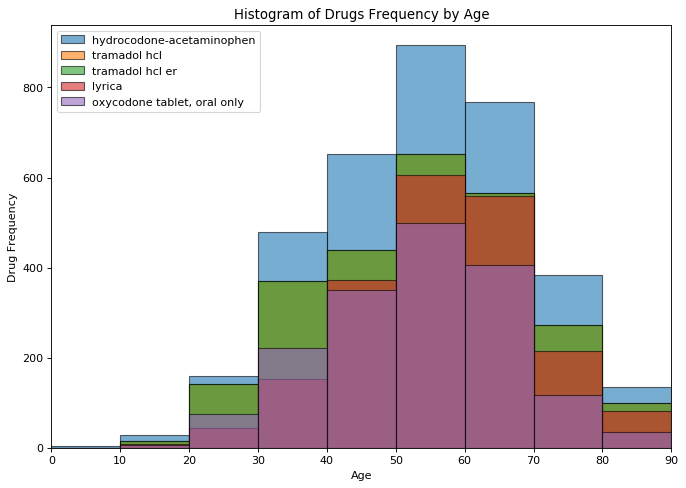

In [19]:
# Extract top five drugs used the most 
drug_data=pd.Series(df_data.groupby('Drug')['Drug'].count())
drug_data=drug_data.sort_values(ascending=False)
top_five=drug_data.index[:5]

# Subset to the top 5 drugs
top_five_drug=df_data[df_data['Drug'].isin(top_five)]

#figure size
plt.figure(figsize=(10,7), dpi= 80)
bins=[0,10,20,30,40,50,60,70,80, 90]

# Iterate through each of the five drugs
for medicine in top_five:
    subset=top_five_drug[top_five_drug['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.6,edgecolor='k',
                label=medicine)
plt.xlim(0,90)    
plt.legend()
plt.title('Histogram of Drugs Frequency by Age'); plt.xlabel('Age'); plt.ylabel('Drug Frequency')

### Frequency Histogram of EaseofUse for top five drugs

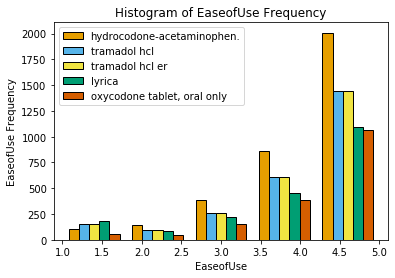

In [28]:
# Extract EaseofUse for top five drugs used  
x1 = list(df_data[df_data['Drug'] == 'hydrocodone-acetaminophen']['EaseofUse'])
x2 = list(df_data[df_data['Drug'] == 'tramadol hcl']['EaseofUse'])
x3 = list(df_data[df_data['Drug'] == 'tramadol hcl er']['EaseofUse'])
x4 = list(df_data[df_data['Drug'] == 'lyrica']['EaseofUse'])
x5 = list(df_data[df_data['Drug'] == 'oxycodone tablet, oral only']['EaseofUse'])

# Assign colors for each Drug and EaseofUse
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']

plt.hist([x1, x2, x3, x4, x5], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('EaseofUse')
plt.ylabel('EaseofUse Frequency')
plt.title('Histogram of EaseofUse Frequency');

### Frequency Histogram of Effectiveness for top five drugs

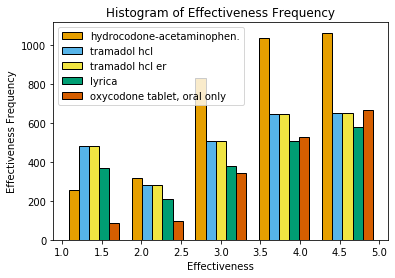

In [29]:
# Extract EaseofUse for top five drugs used  
x6 = list(df_data[df_data['Drug'] == 'hydrocodone-acetaminophen']['Effectiveness'])
x7 = list(df_data[df_data['Drug'] == 'tramadol hcl']['Effectiveness'])
x8 = list(df_data[df_data['Drug'] == 'tramadol hcl er']['Effectiveness'])
x9 = list(df_data[df_data['Drug'] == 'lyrica']['Effectiveness'])
x10 = list(df_data[df_data['Drug'] == 'oxycodone tablet, oral only']['Effectiveness'])

# Assign colors for each Drug and EaseofUse
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']

plt.hist([x6, x7, x8, x9, x10], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('Effectiveness')
plt.ylabel('Effectiveness Frequency')
plt.title('Histogram of Effectiveness Frequency');

## 8.2 Probability Hinstogram

### Proability Histogram of top five Drug by Age

Text(0, 0.5, 'Drug Probability')

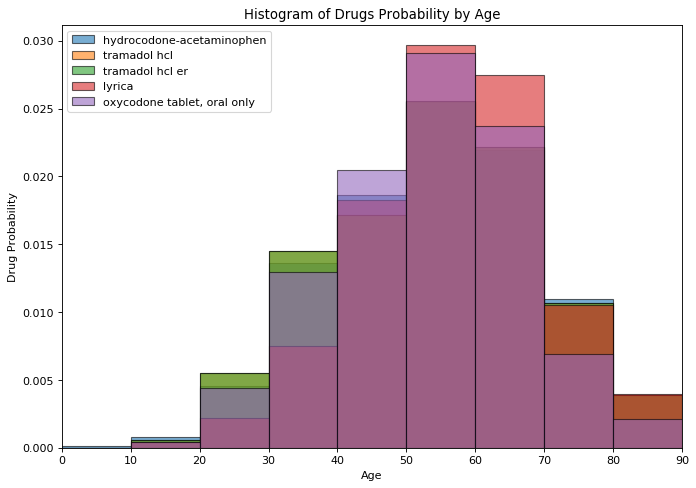

In [27]:
#figure size
plt.figure(figsize=(10,7), dpi= 80)
bins=[0,10,20,30,40,50,60,70,80, 90]

# Iterate through each of the five drugs
for medicine in top_five:
    subset=top_five_drug[top_five_drug['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.6,edgecolor='k', density=True,
                label=medicine)
plt.xlim(0,90)    
plt.legend()
plt.title('Histogram of Drugs Probability by Age'); plt.xlabel('Age'); plt.ylabel('Drug Probability')

### Proability Histogram of EaseofUse for top five drugs

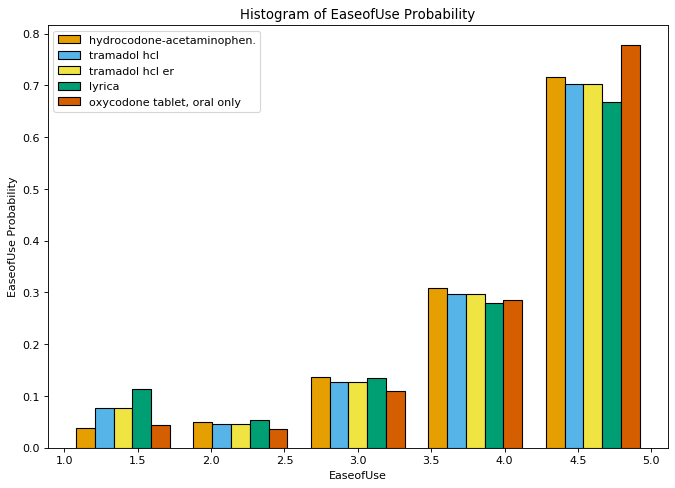

In [33]:
plt.figure(figsize=(10,7), dpi= 80)
plt.hist([x1, x2, x3, x4, x5], bins = 5, edgecolor='k', density=True,
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('EaseofUse')
plt.ylabel('EaseofUse Probability')
plt.title('Histogram of EaseofUse Probability');

### Proability Histogram of Effectiveness for top five drugs

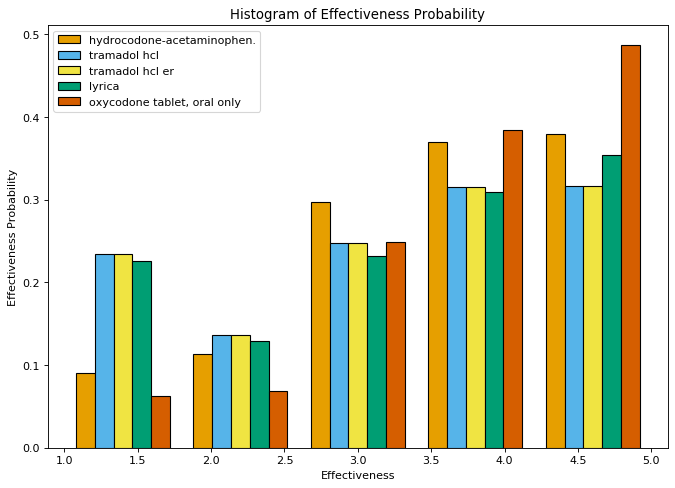

In [32]:
plt.figure(figsize=(10,7), dpi= 80)
plt.hist([x6, x7, x8, x9, x10], bins = 5, edgecolor='k', density=True,
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('Effectiveness')
plt.ylabel('Effectiveness Probability')
plt.title('Histogram of Effectiveness Probability');

# 9 Find out the Determining variable between Effectiveness and EaseofUse for Rating

#### Commulative EaseofUse per drug in descending order

In [34]:
commulative_EaseofUse_per_drug=df_data.groupby('Drug').EaseofUse.sum().sort_values(ascending=False)

In [35]:
#to display the top 5 rows
commulative_EaseofUse_per_drug.head(5)

Drug
hydrocodone-acetaminophen    15034
tramadol hcl                 10745
tramadol hcl er              10745
lyrica                        8291
oxycodone hcl solution        7494
Name: EaseofUse, dtype: int64

#### Commulative Effectiveness per drug in descending order

In [36]:
commulative_Effectiveness_per_drug=df_data.groupby('Drug').Effectiveness.sum().sort_values(ascending=False)

In [37]:
#to display the top 5 rows
commulative_Effectiveness_per_drug.head(5)

Drug
hydrocodone-acetaminophen    12843
tramadol hcl er               8374
tramadol hcl                  8374
lyrica                        6828
oxycodone hcl                 6735
Name: Effectiveness, dtype: int64

#### Drug count

In [38]:
Drug_count=df_data.Drug.value_counts()

In [39]:
#to display the top 5 rows
Drug_count.head(5)

hydrocodone-acetaminophen    3504
tramadol hcl                 2557
tramadol hcl er              2557
lyrica                       2039
oxycodone hcl solution       1713
Name: Drug, dtype: int64

##### In order to compare the effect of EaseofUse and Effectiveness of the drug on the Rating, the commulative Easeof Use and Effectiveness should be normilized by number of drugs used since all top five the drug types are the same 

In [50]:
EaseofUse_Drug_ratio = (commulative_EaseofUse_per_drug / Drug_count).sort_values(ascending=False)

In [51]:
Effectiveness_Drug_ratio=(commulative_Effectiveness_per_drug / Drug_count).sort_values(ascending=False)

#### calculate the commulative rating for each drugs for comparison porpuse  

In [52]:
commulative_Rating_per_drug=df_data.groupby('Drug').Rating.sum().sort_values(ascending=False)

In [53]:
commulative_Rating_per_drug.head()

Drug
hydrocodone-acetaminophen    12475
tramadol hcl er               7862
tramadol hcl                  7862
oxycodone hcl                 6424
oxycodone hcl er              6424
Name: Rating, dtype: int64

In [54]:
Rating_Drug_ratio = (commulative_Rating_per_drug / Drug_count).sort_values(ascending=False)

##### ploting the comparison graph

No handles with labels found to put in legend.


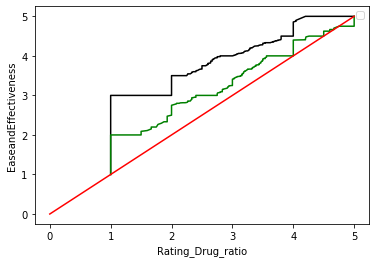

In [58]:
x=[0,1,2,3,4,5]
y=[0,1,2,3,4,5]
plt.plot(Rating_Drug_ratio,EaseofUse_Drug_ratio, 'k', 
        Rating_Drug_ratio, Effectiveness_Drug_ratio, 'g',
        x,y,'-r')
plt.xlabel('Rating_Drug_ratio')
plt.ylabel('EaseandEffectiveness')
plt.legend()
plt.show()


###### Looking at the comparison plot: drug effectiveness variable can determine the rating of the drug over the EaseofUse.